In [1]:
import operator

from matplotlib import pyplot as plt
from numpy import *

In [2]:
def creatDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
group, labels = creatDataSet()

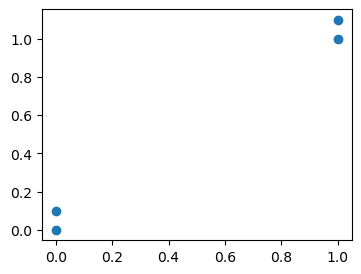

In [4]:
x1 = group[:, :1]
x2 = group[:, 1:]

fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(x1, x2)
plt.show()

# K-近邻算法（K-Nearest Neighbors, KNN）

K-近邻算法是一种常用于分类和回归的非参数算法。它的基本思想是给定一个待分类的样本，找到距离该样本最近的K个训练样本点，根据这K个样本的类别进行投票决定待分类样本的类别。

## 1. 数学推导

假设有一个训练集 $\( \mathcal{D} = \{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \dots, (\mathbf{x}_N, y_N)\} \)$，其中 $\( \mathbf{x}_i \)$ 表示第 $\(i\)$ 个样本的特征向量， $\( y_i \)$ 表示该样本的标签。

给定一个待分类的样本 $\( \mathbf{x} \)$，KNN算法的步骤如下：

### 1.1 计算距离

对于待分类样本 $\( \mathbf{x} \)$ 和每个训练样本 $\( \mathbf{x}_i \)$，计算它们之间的距离，这个距离是一个特征向量与每一个训练向量的距离，然后再计算求和。常用的距离度量包括欧氏距离、曼哈顿距离等。以欧氏距离为例：

$\[
d(\mathbf{x}, \mathbf{x}_i) = \sqrt{\sum_{j=1}^{m} (x_j - x_{ij})^2}
\]$

其中，$\( \mathbf{x} = (x_1, x_2, \dots, x_m) \)$，$\( \mathbf{x}_i = (x_{i1}, x_{i2}, \dots, x_{im}) \)$。

### 1.2 选择最近的K个邻居

根据计算出的距离，选择距离最近的K个训练样本点，记为 $\( \mathcal{N}_K(\mathbf{x}) \)$。

### 1.3 分类决策

对于分类任务，KNN算法通过对这K个邻居的类别进行投票，选择得票数最多的类别作为待分类样本 $\( \mathbf{x} \)$ 的类别：

$\[
\hat{y} = \arg\max_{c} \sum_{(\mathbf{x}_i, y_i) \in \mathcal{N}_K(\mathbf{x})} \mathbf{1}(y_i = c)
\]$

其中， $\( c \)$ 是可能的类别，$\( \mathbf{1} \)$ 是指示函数，若 $\( y_i = c \)$，则 $\( \mathbf{1}(y_i = c) = 1 \)$；否则 $\( \mathbf{1}(y_i = c) = 0 \)$。


总的来说，先计算距离，然后按距离升序，对前K个进行计数，统计不同标签出现的次数，最后降序，返回出现数量最多的标签

In [5]:
def classify0(inX, dataSet, labels, k):
    # inX代表一个（1，n）的向量
    dataSetSize = dataSet.shape[0]
    # 生成和dataset一样的形状的矩阵，进行向量运算
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    # 按列相加
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    # 从小到大排序，但是返回值为索引值
    sortedDistIndicies = distances.argsort()    # 索引值列表
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [6]:
inX = array([1.0, 2.0])
classify0(inX, group, labels, 3)

'A'